<a href="https://www.kaggle.com/code/abhijitdarekar001/eda-baseline-models-customer-churning?scriptVersionId=157630953" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")
pallet = sns.color_palette('pastel')
cmap='Pastel1'

In [94]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
data = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [23]:
data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [5]:
data.isna().sum()/len(data)

id                 0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [6]:
df = data.copy()
df.drop(['id','CustomerId','Surname'],axis=1, inplace = True)
data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [7]:
num_features = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
cat_features = ['Geography','Gender','HasCrCard','IsActiveMember']
print("Catogerical Featres : "," ".join(cat_features))
print("Numerical Featres : "," ".join(num_features))

Catogerical Featres :  Geography Gender HasCrCard IsActiveMember
Numerical Featres :  CreditScore Age Tenure Balance NumOfProducts EstimatedSalary


### EDA

#### Plotting Heatmap

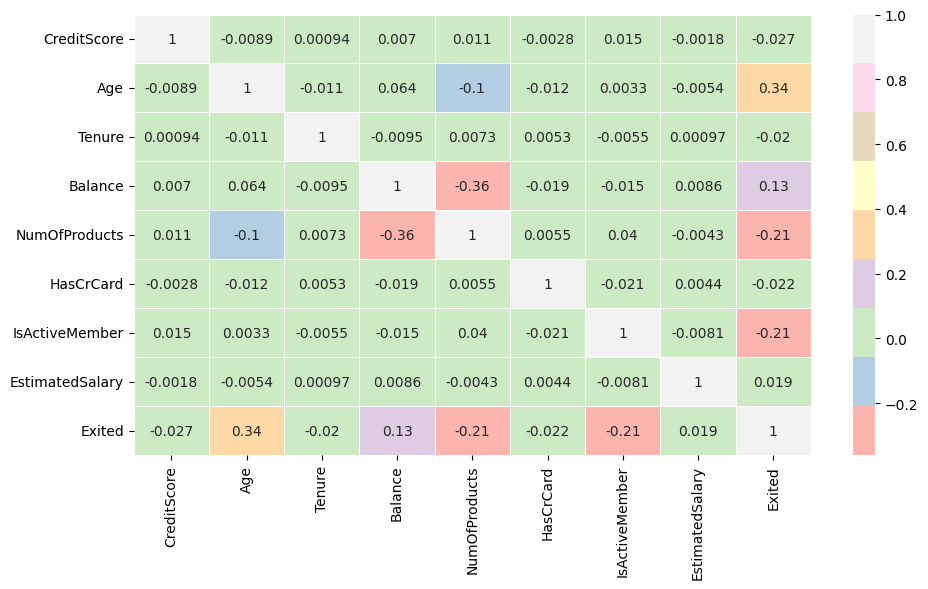

In [101]:
plt.figure(figsize = (10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr,annot = True,cmap=cmap, linewidths=0.5)
plt.tight_layout()

Based on the heatmap, all no feature is highly dependent on each other.

#### Understanding the Data

<Axes: xlabel='Exited', ylabel='count'>

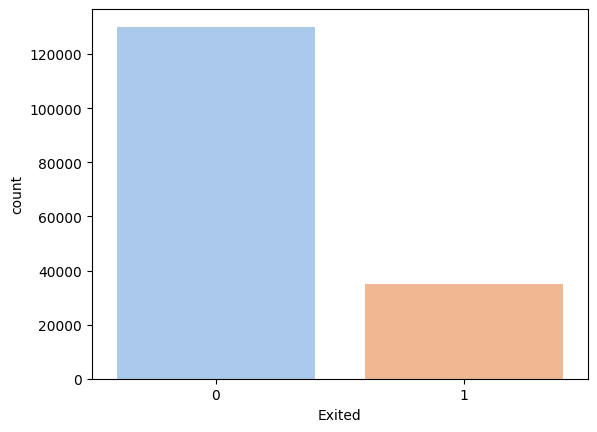

In [102]:
# Plotting Target Variable
sns.countplot(df, x='Exited',palette=pallet)

##### Plotting the distribution of Catogerical Data

In [104]:
# plt.suptitle("Catogerical Data Distrubution")
# plt.subplot(2,2,1)
# plt.title("Distribution of Geography")

##### Plotting the distribution of numerical data

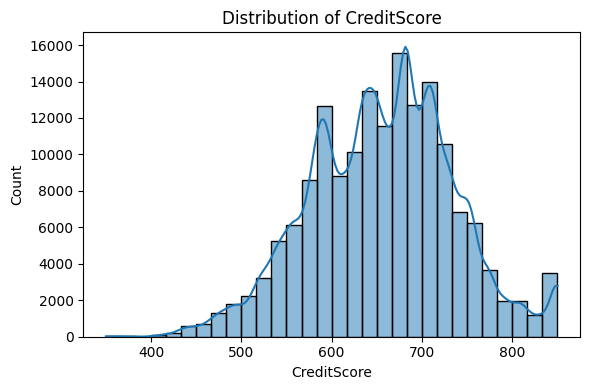

In [105]:
plt.figure(figsize = (6,4))
sns.histplot(df[num_features[0]],palette=pallet,kde=True,bins=30)
plt.title(f"Distribution of {num_features[0]}")
plt.tight_layout()

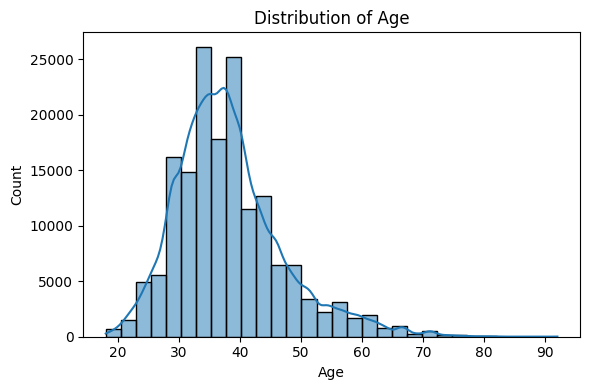

In [106]:
plt.figure(figsize = (6,4))
sns.histplot(df[num_features[1]],palette=pallet,kde=True,bins=30)
plt.title(f"Distribution of {num_features[1]}")
plt.tight_layout()

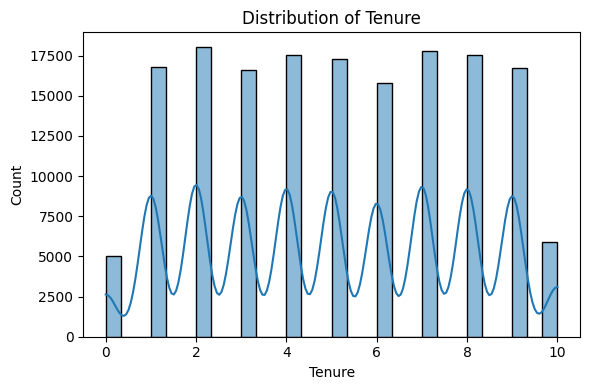

In [209]:
plt.figure(figsize = (6,4))
sns.histplot(df[num_features[2]],palette=pallet,kde=True,bins=30)
plt.title(f"Distribution of {num_features[2]}")
plt.tight_layout()

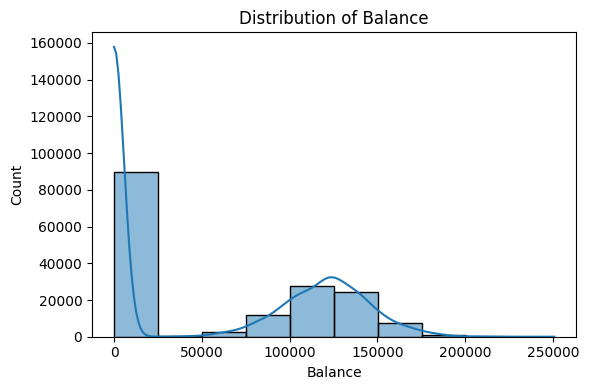

In [107]:
plt.figure(figsize = (6,4))
sns.histplot(df[num_features[3]],palette=pallet,kde=True,bins=10)
plt.title(f"Distribution of {num_features[3]}")
plt.tight_layout()

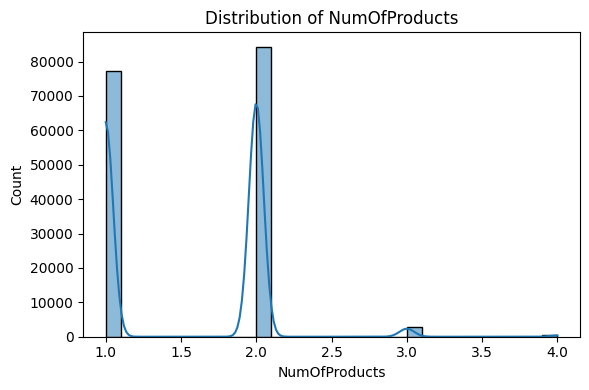

In [108]:
plt.figure(figsize = (6,4))
sns.histplot(df[num_features[4]],palette=pallet,kde=True,bins=30)
plt.title(f"Distribution of {num_features[4]}")
plt.tight_layout()

#### Plotting Each Independent feature again target variable.
##### Plotting Credit Score with Exited with respect to age of person

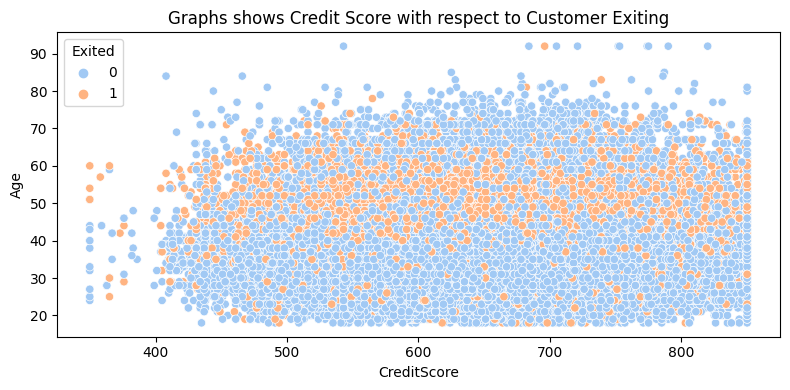

In [112]:
plt.figure(figsize =(8,4))
plt.title("Graphs shows Credit Score with respect to Customer Exiting")
sns.scatterplot(df,x='CreditScore',y='Age',palette=pallet,hue='Exited',legend='full')
plt.tight_layout()

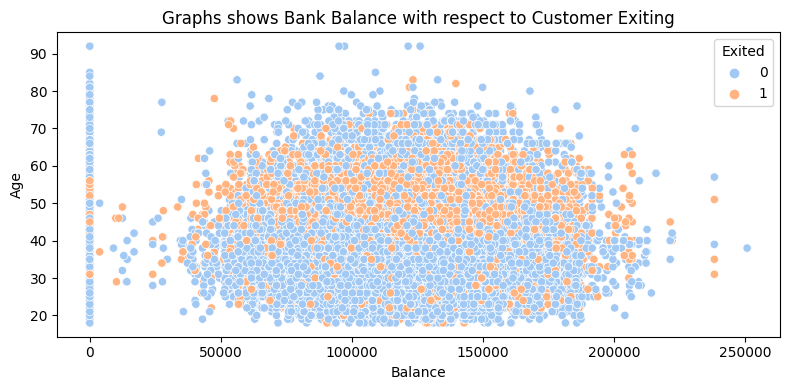

In [111]:
plt.figure(figsize =(8,4))
plt.title("Graphs shows Bank Balance with respect to Customer Exiting")
sns.scatterplot(df,x='Balance',y='Age',hue='Exited',palette=pallet)
plt.tight_layout()

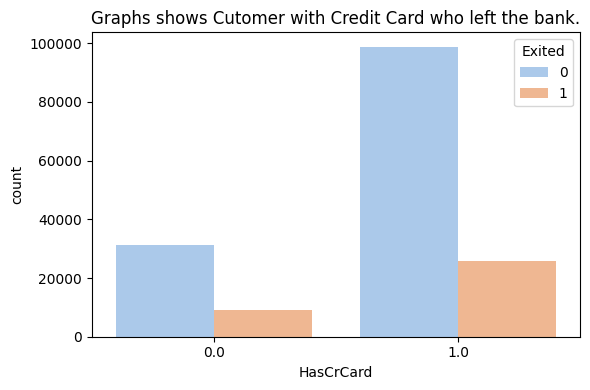

In [115]:
plt.figure(figsize = (6,4))
plt.title("Graphs shows Customer with Credit Card who left the bank.")
sns.countplot(df,x='HasCrCard',hue='Exited',palette=pallet)
plt.tight_layout()

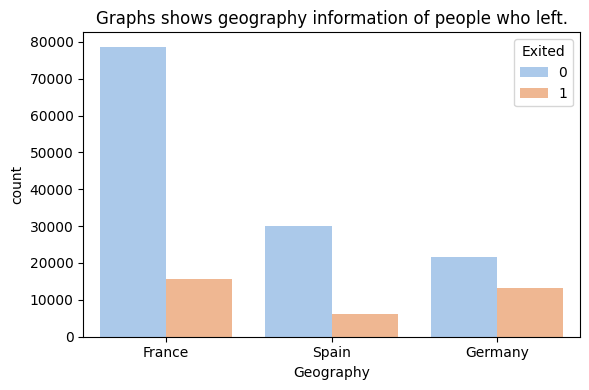

In [118]:
plt.figure(figsize = (6,4))
plt.title("Graphs shows geography information of people who left.")
sns.countplot(df,x='Geography',hue='Exited',palette=pallet)
plt.tight_layout()

### Feature Engineering

In [8]:
# Encoding Catogerical features
df_cat = df[cat_features]
df_cat = pd.concat([pd.get_dummies(df_cat.Gender,dtype=int),df_cat],axis=1)
df_cat = pd.concat([pd.get_dummies(df_cat.Geography,dtype=int),df_cat],axis=1)
df_cat.drop(['Geography','Gender'],axis=1,inplace=True)
df_cat.HasCrCard = df_cat.HasCrCard.astype(int)
df_cat.IsActiveMember = df_cat.IsActiveMember.astype(int)

In [9]:
# Scaling Numerical features
df_num = df[num_features]

standard_scalar = StandardScaler()
scaled_data = standard_scalar.fit_transform(df_num)
df_num = pd.DataFrame(scaled_data,columns=df_num.columns)

In [10]:
# Combining scaled data
new_df = pd.concat([df_num,df_cat,data.Exited],axis=1)

In [65]:
def get_metrics(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print("Accuracy Score :",acc)
    
    conf = confusion_matrix(y_test,y_pred)
    print("Confusion Matrix :\n",conf)

#### Modelling

As we have highly imbalanced dataset incase of churning, lets considerd the following case for model building and testing.

1. Splitting the data ignoring the imblanace of target data.
2. Seperating both labels, splitting the data and then combining(shuffling) the data into triain and test data.
3. Using `imbalance-learn` , By testing out `UnderSampling` and `SMOTE`

#### Case 1

In [48]:
def get_case_1_data(df):
    return train_test_split(df.drop("Exited",axis=1),df['Exited'],test_size=0.3, random_state=42)

#### Case 2

In [72]:
def get_case_2_data(df):
    is_exited  = df[df.Exited==1].reset_index(drop=True)
    not_exited =  df[df.Exited==0].reset_index(drop=True)

    a,b = train_test_split(is_exited,test_size=0.2)
    c,d = train_test_split(not_exited,test_size=0.2)

    final_Train = pd.concat([a,c]).sample(len(a)+len(c)).reset_index(drop=True)
    final_Test = pd.concat([b,d]).sample(len(b)+len(d)).reset_index(drop=True)

    X_train , y_train = final_Train.drop('Exited',axis=1),final_Train['Exited']
    X_test , y_test = final_Test.drop('Exited',axis=1),final_Test['Exited']

    return  X_train, X_test, y_train, y_test

##### Logistic Regression

In [88]:
# Logistic Regression Model with Case 1
print("Logistic Regression..")
X_train, X_test, y_train, y_test = get_case_1_data(new_df)

lgc = LogisticRegression()
lgc.fit(X_train,y_train)
y_pred = lgc.predict(X_test)

get_metrics(y_test,y_pred)

Logistic Regression..
Accuracy Score : 0.8353497202641837
Confusion Matrix :
 [[37351  1782]
 [ 6370  4008]]


In [89]:
# Logistic Regression Model with Case 2
print("Logistic Regression..")
X_train, X_test, y_train, y_test = get_case_2_data(new_df)

lgc1 = LogisticRegression()
lgc1.fit(X_train,y_train)
y_pred = lgc1.predict(X_test)

get_metrics(y_test,y_pred)

Logistic Regression..
Accuracy Score : 0.8343431895298109
Confusion Matrix :
 [[24843  1180]
 [ 4288  2697]]


##### Random Foreset Model

In [91]:
# Random Foreset Model with Case 1
X_train, X_test, y_train, y_test = get_case_1_data(new_df)
print("RandomForesetClassifier")
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

get_metrics(y_test,y_pred)

RandomForesetClassifier
Accuracy Score : 0.85956656096625
Confusion Matrix :
 [[36967  2166]
 [ 4787  5591]]


In [90]:
# Random Forest model with case 2
print("RandomForesetClassifier")

X_train, X_test, y_train, y_test = get_case_2_data(new_df)

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

get_metrics(y_test,y_pred)

RandomForesetClassifier
Accuracy Score : 0.859337130392632
Confusion Matrix :
 [[24600  1423]
 [ 3220  3765]]


##### XGBClassifier

In [92]:
# XGboost Model with Case 1
print("XGBClassifier")
X_train, X_test, y_train, y_test = get_case_1_data(new_df)

xgbc1 = XGBClassifier()
xgbc1.fit(X_train,y_train)
y_pred = xgbc1.predict(X_test)

get_metrics(y_test,y_pred)

XGBClassifier
Accuracy Score : 0.8641917957625578
Confusion Matrix :
 [[37012  2121]
 [ 4603  5775]]


In [93]:
# XGboost Model with Case 2
print("XGBClassifier")
X_train, X_test, y_train, y_test = get_case_2_data(new_df)

xgbc2 = RandomForestClassifier()
xgbc2.fit(X_train,y_train)
y_pred = xgbc2.predict(X_test)

get_metrics(y_test,y_pred)

XGBClassifier
Accuracy Score : 0.858125302956859
Confusion Matrix :
 [[24535  1488]
 [ 3195  3790]]


In [97]:
print("GradientBoosting Classifier...")
X_train, X_test, y_train, y_test = get_case_1_data(new_df)

gbc1 = GradientBoostingClassifier()
gbc1.fit(X_train,y_train)
y_pred = gbc1.predict(X_test)

get_metrics(y_test,y_pred)

GradientBoosting Classifier...
Accuracy Score : 0.8655450303972855
Confusion Matrix :
 [[37209  1924]
 [ 4733  5645]]


In [98]:
print("GradientBoosting Classifier...")
X_train, X_test, y_train, y_test = get_case_2_data(new_df)

gbc2 = RandomForestClassifier()
gbc2.fit(X_train,y_train)
y_pred = gbc2.predict(X_test)

get_metrics(y_test,y_pred)

GradientBoosting Classifier...
Accuracy Score : 0.8584585555016966
Confusion Matrix :
 [[24595  1428]
 [ 3244  3741]]


**from the above expirements we can see the difference between model performances on sorted dataset and unsorted dataset with classes.**<br>
**Models with unsorted dataset will get imbalanced classes in train and test set leading to which model fails to understand the classes.**<br>

#### Adds On.
1. As from previous base modelling XGBoost perform best on balanced classes of dataset(that is case 2).Hyper parameter optimization on XGboost.
2. Implementing downSampling and SMOTE to test the model performance.